In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Load the data into a pandas DataFrame
airport_data = pd.read_csv('../../data/processed/airport_cleaned.csv')
chakala_data= pd.read_csv('../../data/processed/chakala_cleaned.csv')
kurla_data= pd.read_csv('../../data/processed/kurla_cleaned.csv')

In [4]:
# Convert the 'Date' column to a datetime object
airport_data['From Date'] = pd.to_datetime(airport_data['From Date'])
chakala_data['From Date'] = pd.to_datetime(airport_data['From Date'])
kurla_data['From Date'] = pd.to_datetime(airport_data['From Date'])


In [58]:

# Extract the month, season, and hour from the 'Date' column
airport_data['Month'] = airport_data['From Date'].dt.month
airport_data['Season'] = (airport_data['Month'] % 12 + 3) // 3
airport_data['Hour'] = airport_data['HOUR']
airport_data['Week'] = airport_data['From Date'].dt.dayofweek


# Extract the month, season, and hour from the 'Date' column
chakala_data['Month'] = chakala_data['From Date'].dt.month
chakala_data['Season'] = (chakala_data['Month'] % 12 + 3) // 3
chakala_data['Hour'] = chakala_data['HOUR']

# Extract the month, season, and hour from the 'Date' column
kurla_data['Month'] = kurla_data['From Date'].dt.month
kurla_data['Season'] = (kurla_data['Month'] % 12 + 3) // 3
kurla_data['Hour'] = kurla_data['HOUR']


In [59]:
airport_data['Week'] 

0        5
1        5
2        5
3        5
4        5
        ..
33832    0
33833    0
33834    0
33835    0
33836    0
Name: Week, Length: 33837, dtype: int64

In [60]:
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month = airport_data.groupby('Month').mean()
grouped_season = airport_data.groupby('Season').mean()
grouped_hour = airport_data.groupby('Hour').mean()
grouped_week = airport_data.groupby('Week').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month1 = chakala_data.groupby('Month').mean()
grouped_season1 = chakala_data.groupby('Season').mean()
grouped_hour1 = chakala_data.groupby('Hour').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month2 = kurla_data.groupby('Month').mean()
grouped_season2 = kurla_data.groupby('Season').mean()
grouped_hour2 = kurla_data.groupby('Hour').mean()

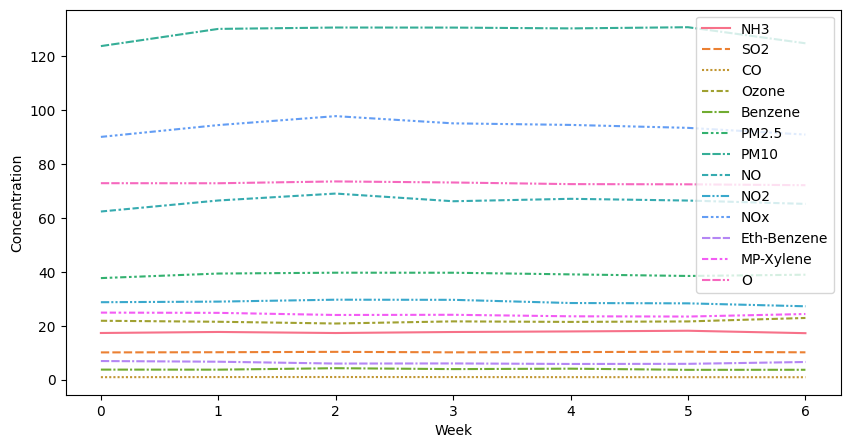

In [61]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_week[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Week')
plt.ylabel('Concentration')
plt.show()

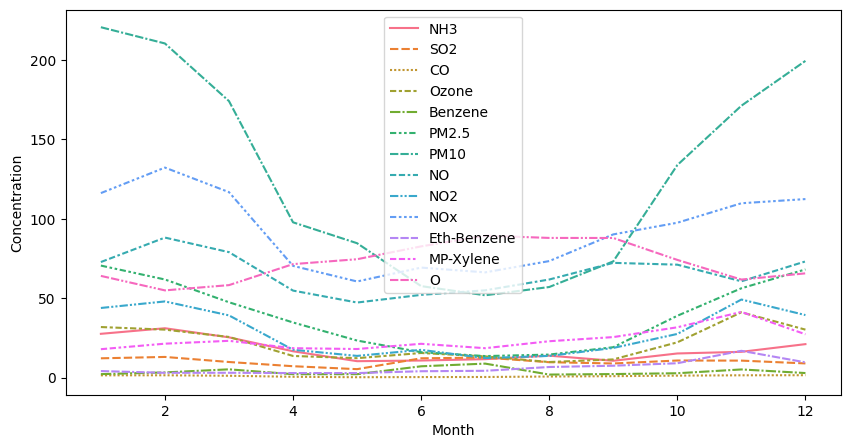

In [48]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_month[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.show()


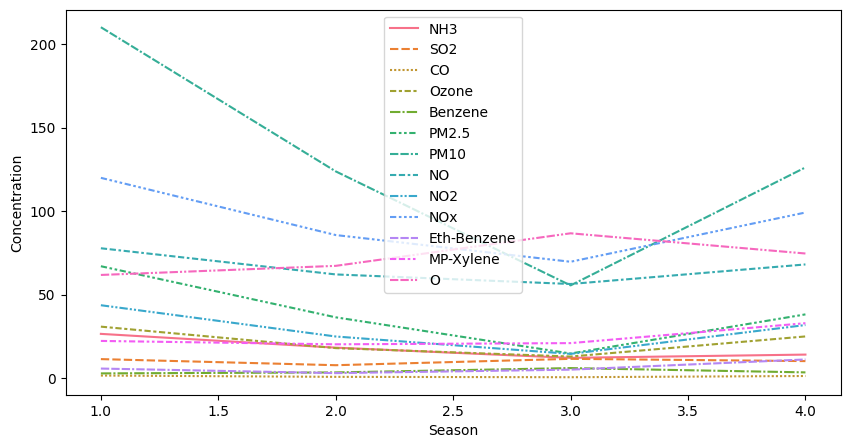

In [49]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_season[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Season')
plt.ylabel('Concentration')
plt.show()


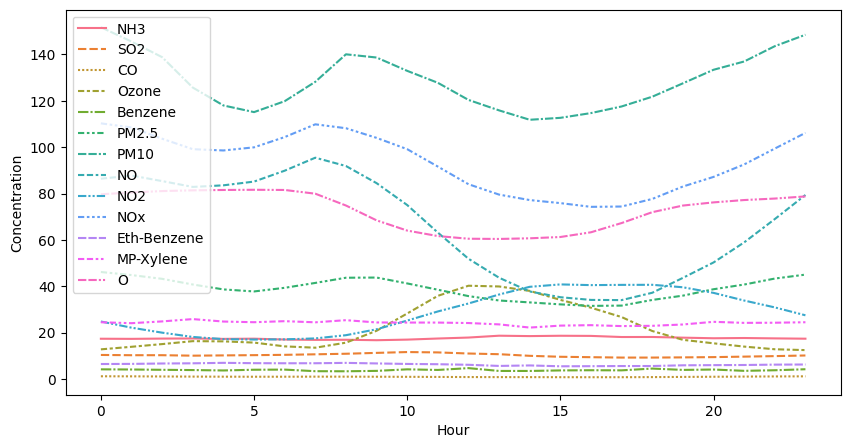

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_hour[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.show()

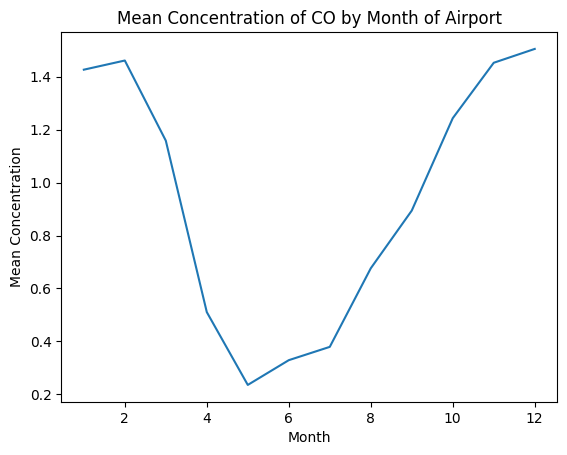

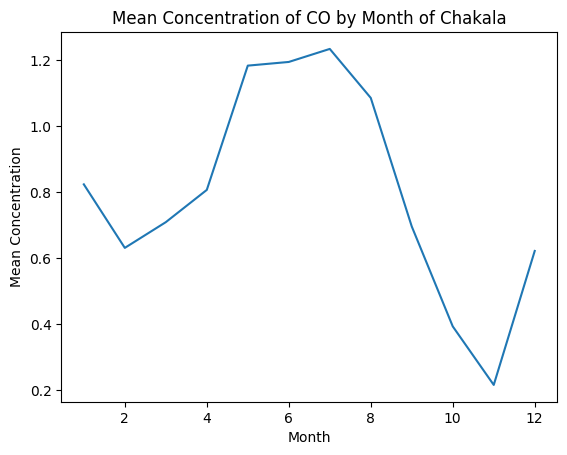

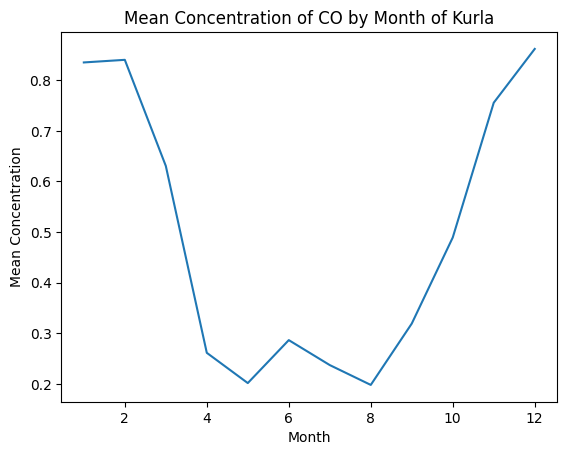

In [10]:
# Select a single pollutant
pollutant = 'CO'

# Extract the month and concentration for the selected pollutant
df_pollutant = airport_data.loc[:, ['From Date', pollutant]]
df_pollutant['month'] = df_pollutant['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant1 = chakala_data.loc[:, ['From Date', pollutant]]
df_pollutant1['month'] = df_pollutant1['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant2 = kurla_data.loc[:, ['From Date', pollutant]]
df_pollutant2['month'] = df_pollutant2['From Date'].dt.month

# Calculate the mean concentration by month
monthly_mean = df_pollutant.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean1 = df_pollutant1.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean2 = df_pollutant2.groupby('month')[pollutant].mean()

# Plot the mean concentration by month
plt.plot(monthly_mean)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Airport'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean1)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Chakala'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean2)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Kurla'.format(pollutant))
plt.show()

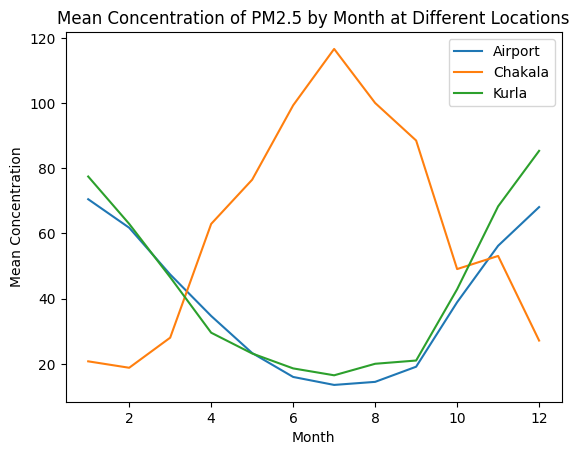

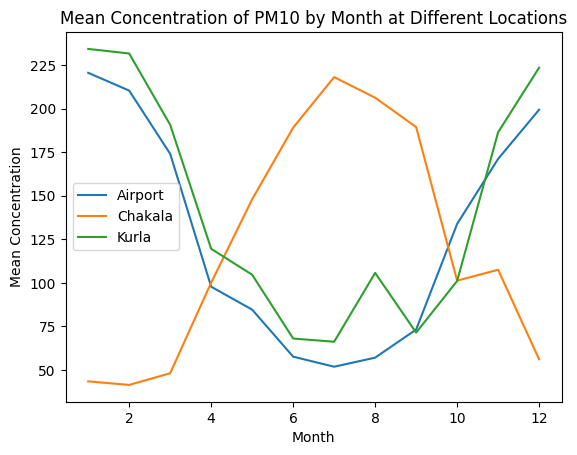

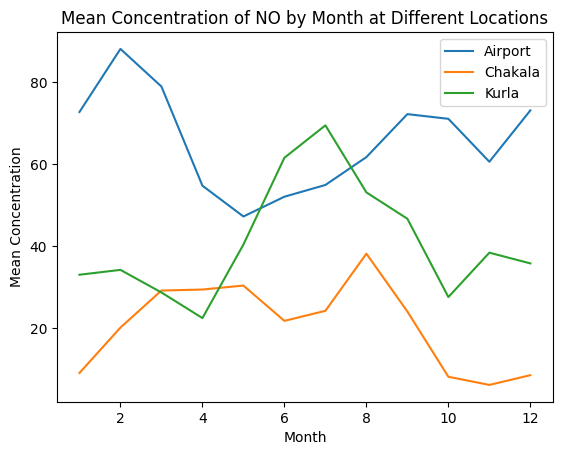

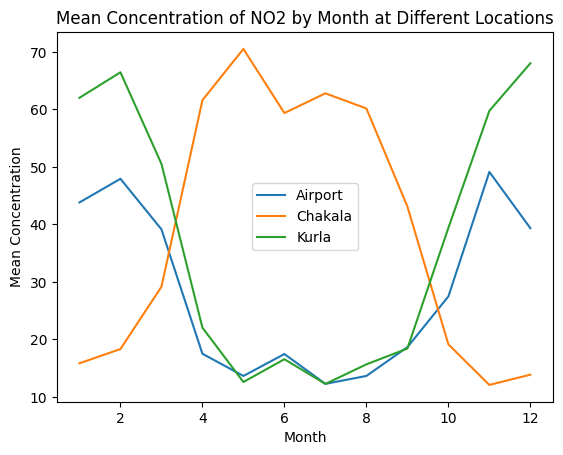

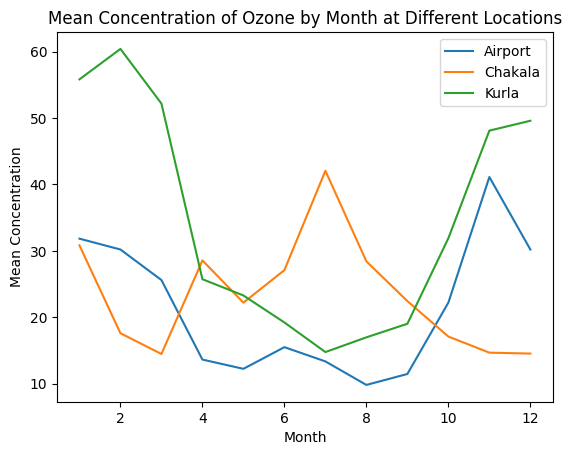

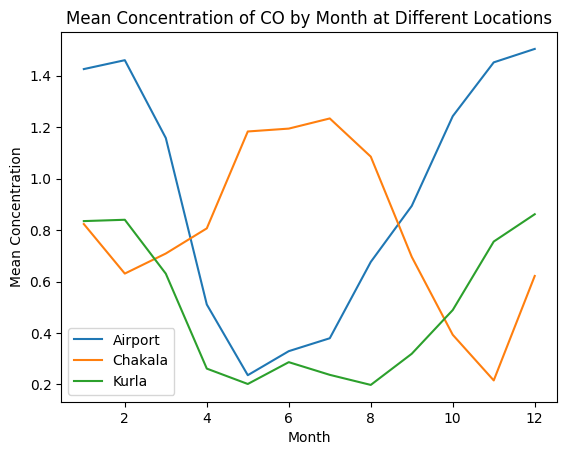

In [11]:
# Select a single pollutant
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'Ozone', 'CO']
for pollutant in pollutants:
    # Extract the month and concentration for the selected pollutant and locations
    df_airport_pollutant = airport_data.loc[:, ['From Date', pollutant]]
    df_airport_pollutant['month'] = df_airport_pollutant['From Date'].dt.month
    monthly_mean_airport = df_airport_pollutant.groupby('month')[pollutant].mean()

    df_chakala_pollutant = chakala_data.loc[:, ['From Date', pollutant]]
    df_chakala_pollutant['month'] = df_chakala_pollutant['From Date'].dt.month
    monthly_mean_chakala = df_chakala_pollutant.groupby('month')[pollutant].mean()

    df_kurla_pollutant = kurla_data.loc[:, ['From Date', pollutant]]
    df_kurla_pollutant['month'] = df_kurla_pollutant['From Date'].dt.month
    monthly_mean_kurla = df_kurla_pollutant.groupby('month')[pollutant].mean()

    # Plot the mean concentration by month for all three locations
    plt.plot(monthly_mean_airport, label='Airport')
    plt.plot(monthly_mean_chakala, label='Chakala')
    plt.plot(monthly_mean_kurla, label='Kurla')
    plt.xlabel('Month')
    plt.ylabel('Mean Concentration')
    plt.title('Mean Concentration of {} by Month at Different Locations'.format(pollutant))
    plt.legend()
    plt.show()

In [24]:
airport_data['Location'] = 'airport'
chakala_data['Location'] = 'chakala'
kurla_data['Location'] = 'kurla'
# Concatenate the data from all three locations into a single dataframe
pollutant_data = pd.concat([airport_data, kurla_data, chakala_data])

In [28]:

# Extract the features (columns) to be used in the clustering analysis
features = pollutant_data[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS', 'WD', 'HOUR', 'MONTH']]

In [31]:
# Define the number of clusters to be identified by the K-means algorithm
n_clusters = 3

In [32]:
# Create a K-means clustering model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(features)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
# Add a new column to the pollutant data dataframe to store the cluster labels
pollutant_data['Cluster'] = kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


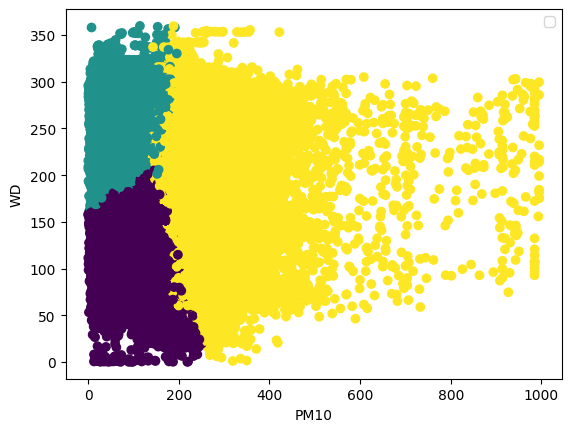

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 44.08712392 103.6110399   38.94213789  31.70969452  14.18829496
    0.69598282  27.01722369   0.96029263 116.22955599   9.50093372
    7.39574679]
 [ 24.64946085  79.69919563  44.40015596  22.61925337  13.78074185
    0.51303839  21.29447806   1.09149394 246.38499298  12.38241309
    6.61471357]
 [ 88.74184409 263.39595514  58.06402748  59.92501465  18.05576169
    1.23259476  38.17756516   0.8413732  201.87748552  12.30057501
    5.29822269]]


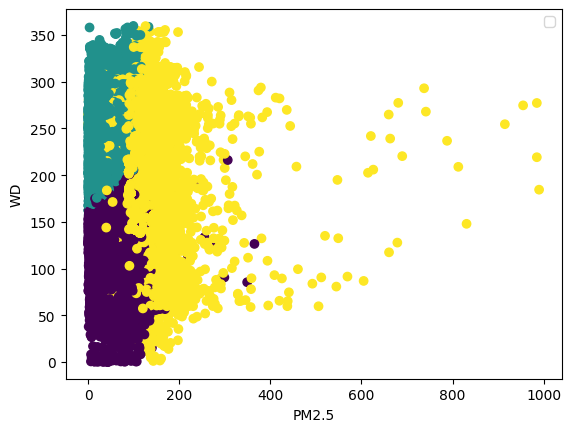

[[ 44.08712392 103.6110399   38.94213789  31.70969452  14.18829496
    0.69598282  27.01722369   0.96029263 116.22955599   9.50093372
    7.39574679]
 [ 24.64946085  79.69919563  44.40015596  22.61925337  13.78074185
    0.51303839  21.29447806   1.09149394 246.38499298  12.38241309
    6.61471357]
 [ 88.74184409 263.39595514  58.06402748  59.92501465  18.05576169
    1.23259476  38.17756516   0.8413732  201.87748552  12.30057501
    5.29822269]]


In [35]:
cols=['PM10', 'PM2.5']
compare=['WD']
for col in cols:
    for com in compare:
        if col!=com:
            # Visualize the clusters using a scatter plot
            plt.scatter(pollutant_data[col], pollutant_data[com], c=pollutant_data['Cluster'])
            plt.xlabel(col)
            plt.ylabel(com)
            plt.legend()
            plt.show()

            # Print the centroids (mean values) of each cluster
            print(kmeans.cluster_centers_)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


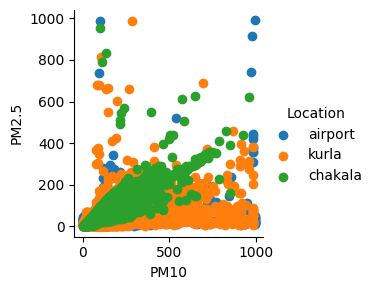

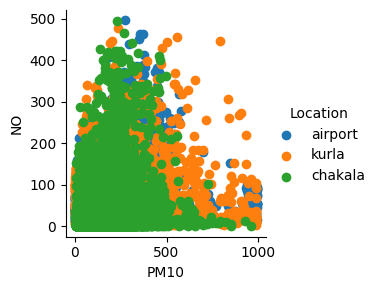

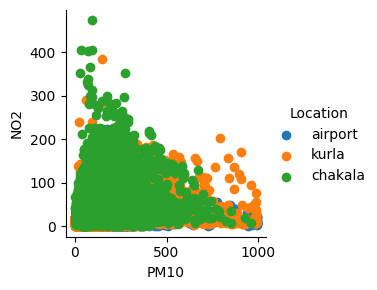

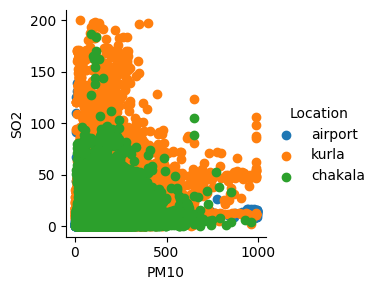

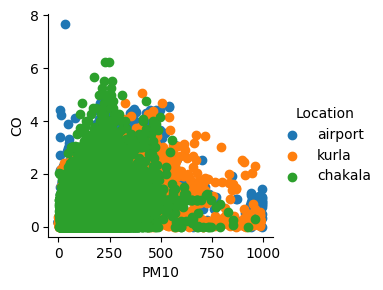

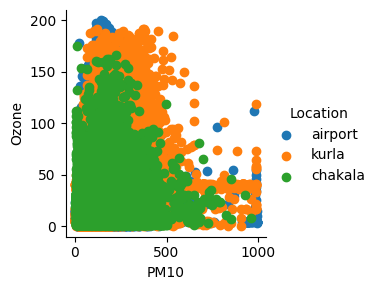

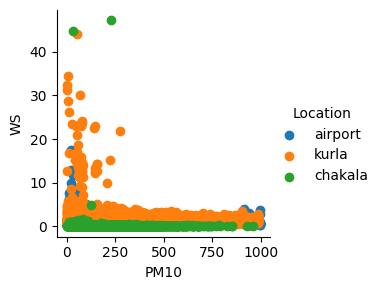

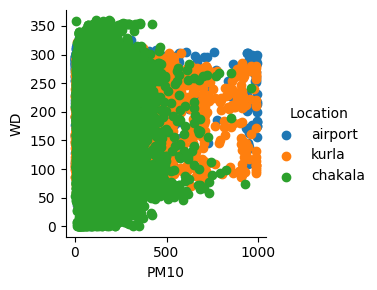

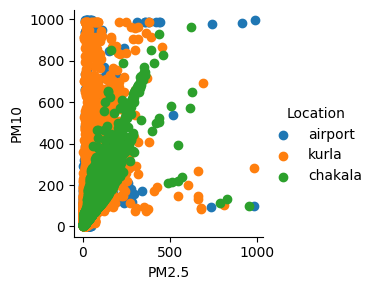

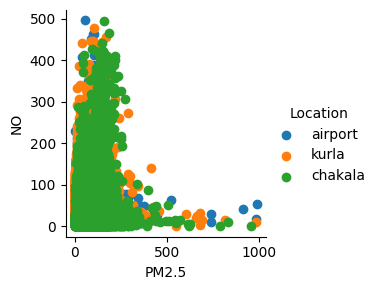

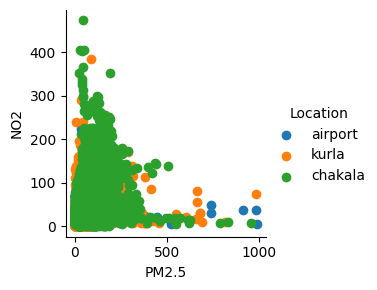

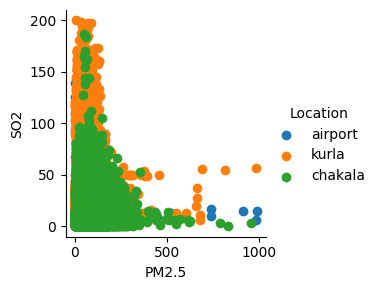

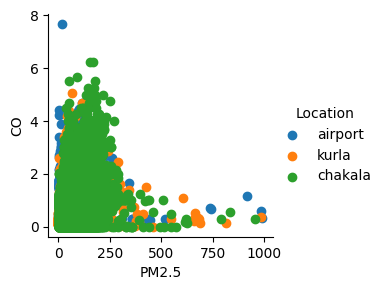

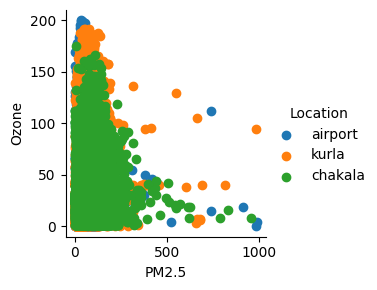

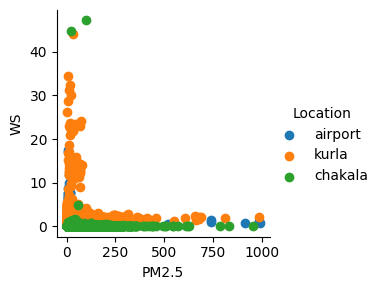

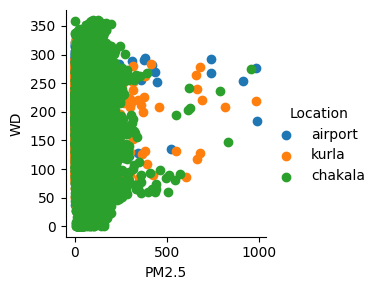

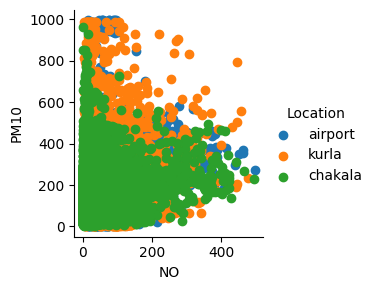

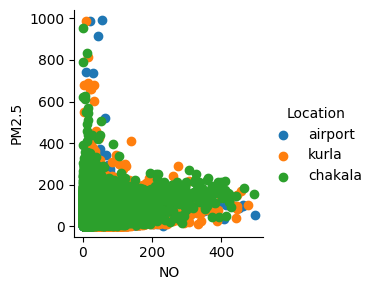

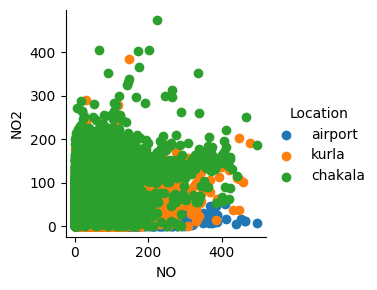

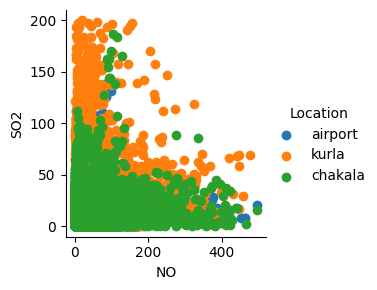

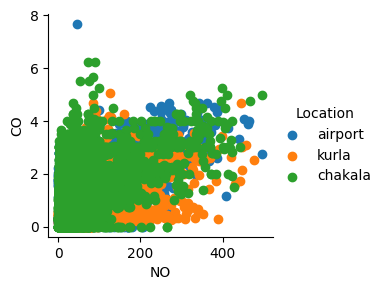

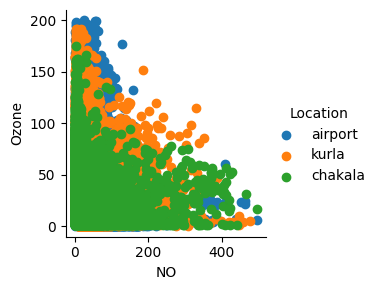

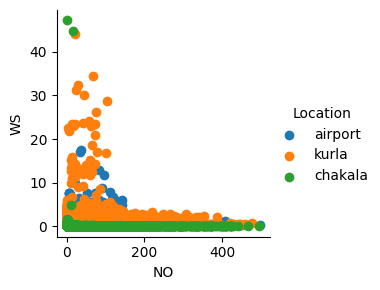

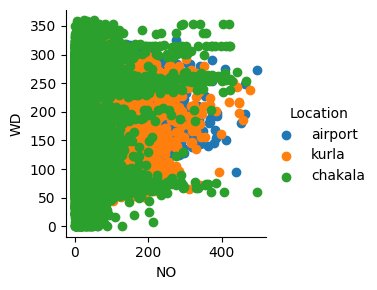

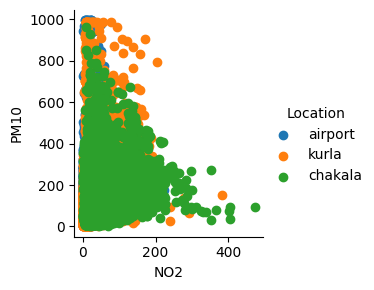

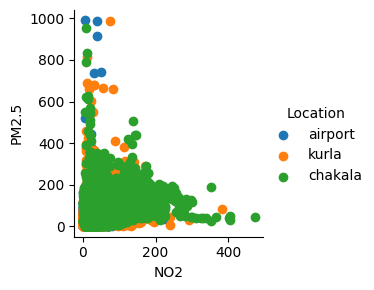

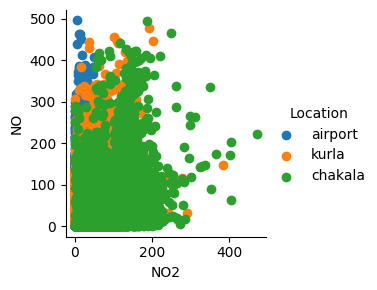

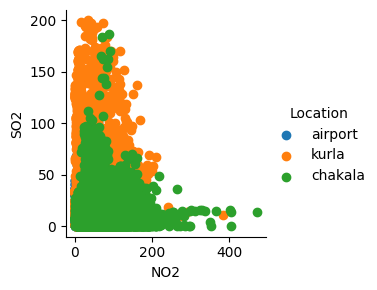

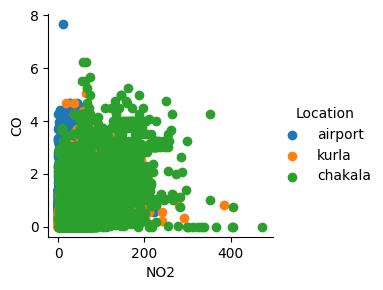

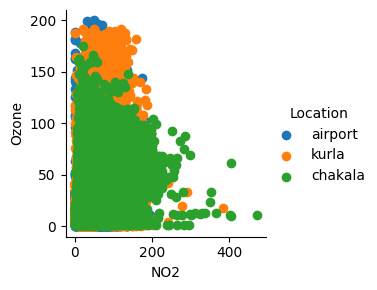

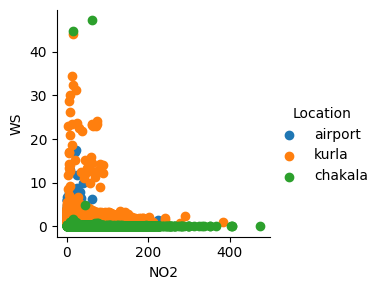

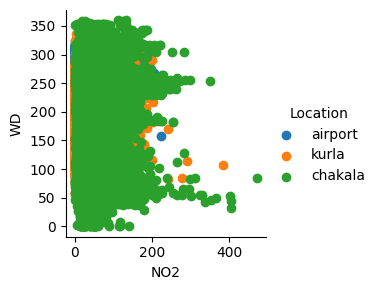

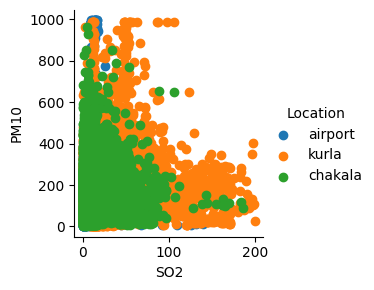

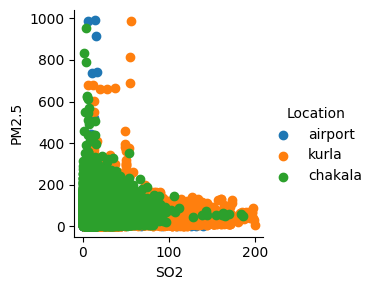

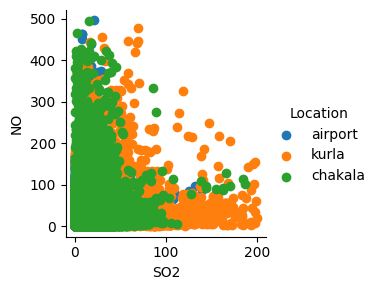

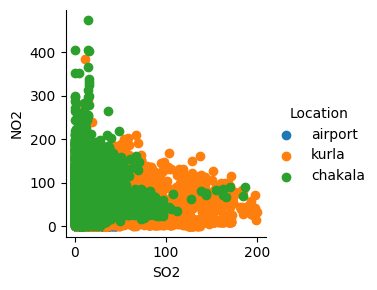

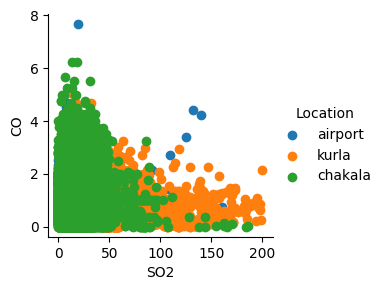

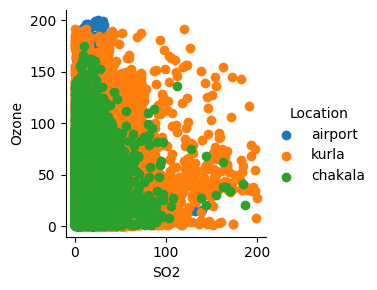

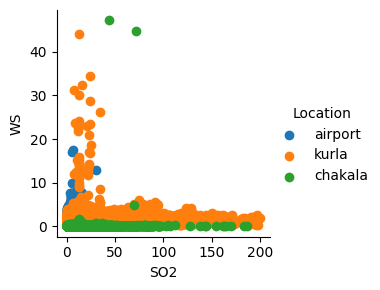

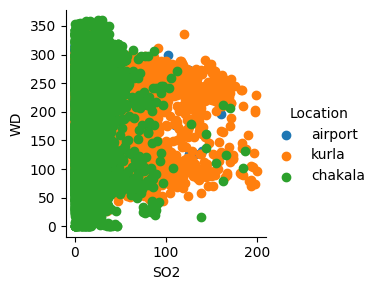

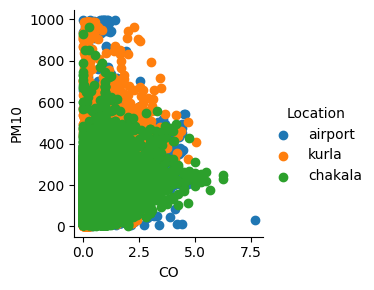

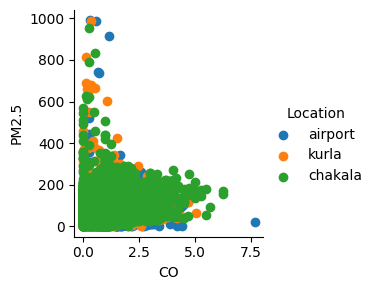

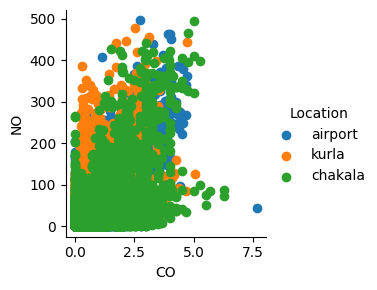

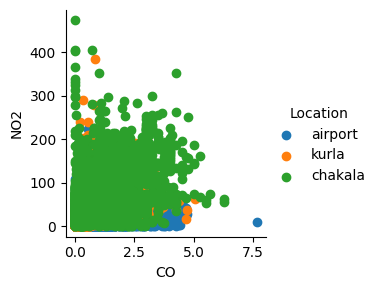

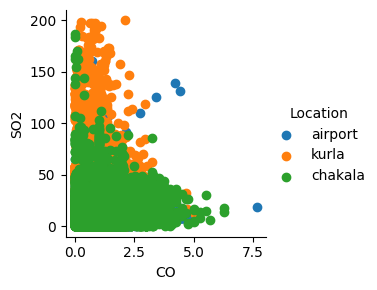

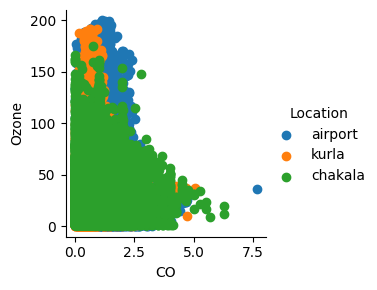

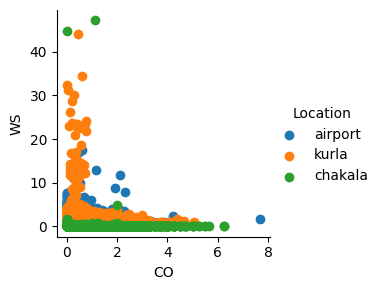

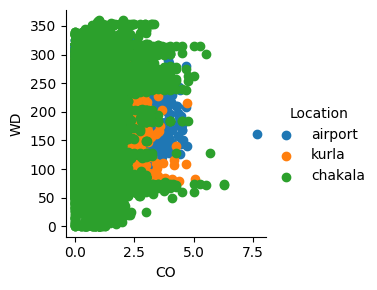

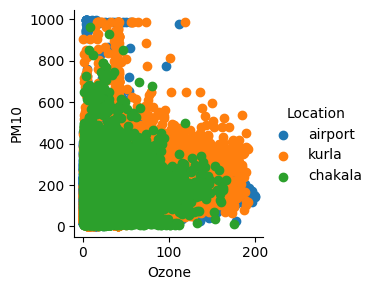

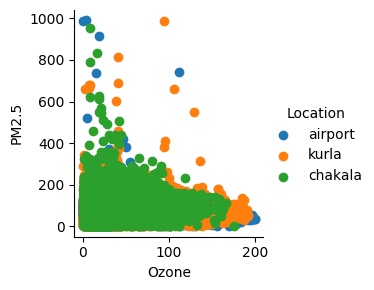

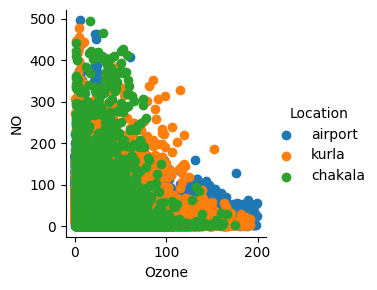

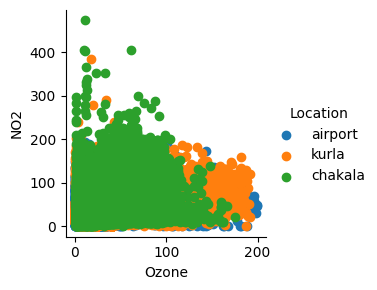

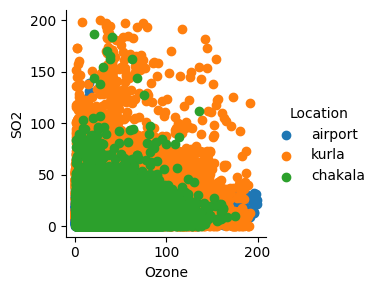

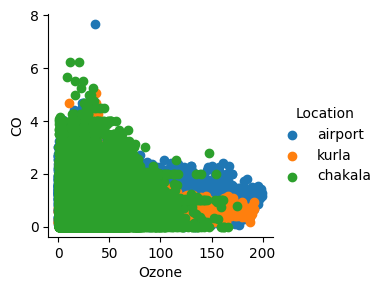

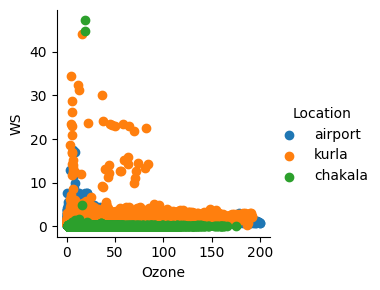

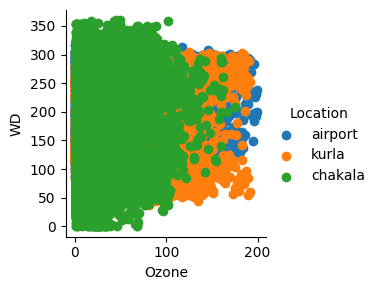

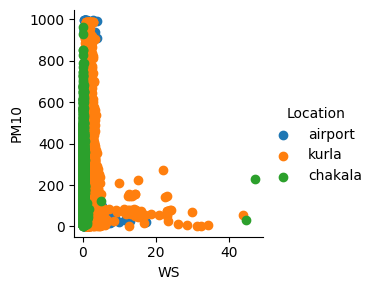

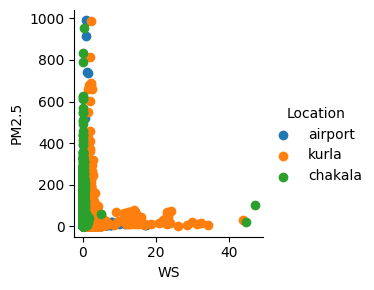

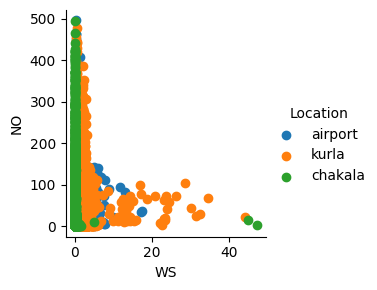

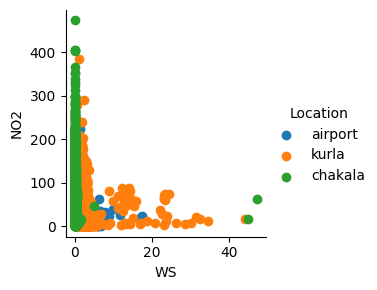

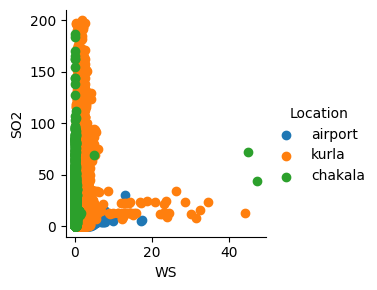

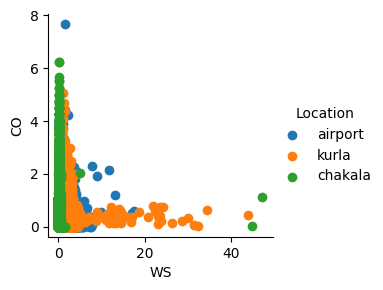

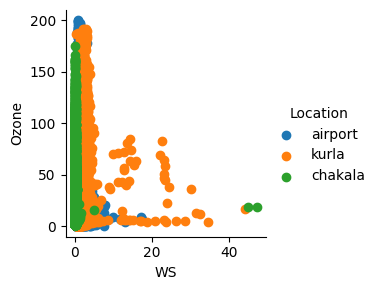

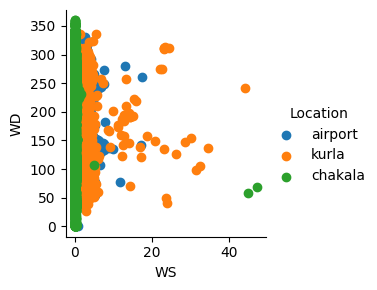

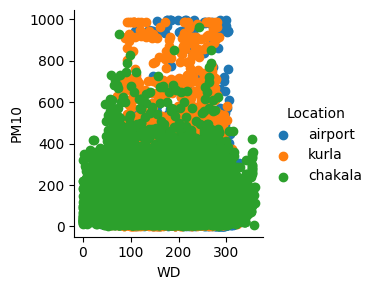

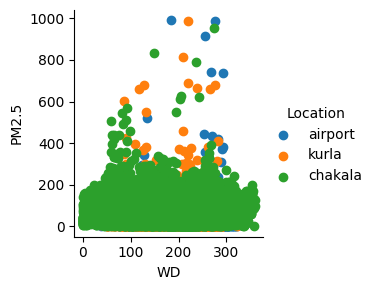

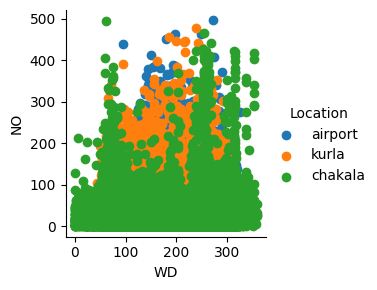

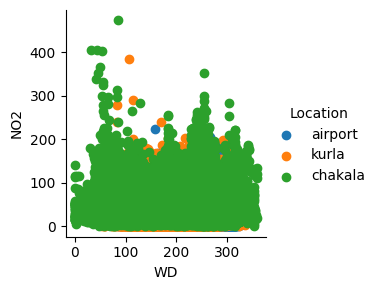

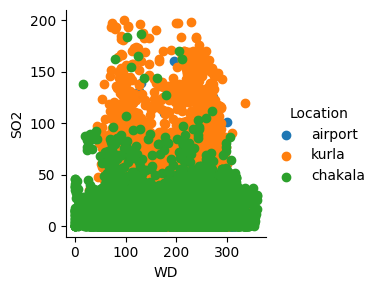

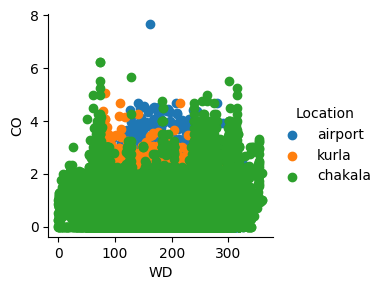

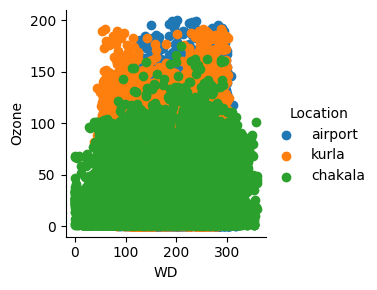

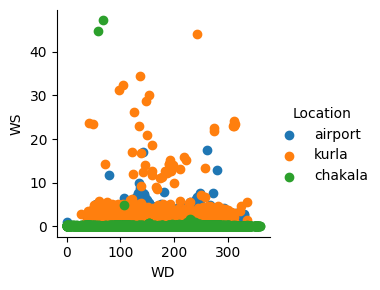

In [41]:
cols=['PM10', 'PM2.5', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS', 'WD']
compare=['PM10', 'PM2.5', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS', 'WD']
for col in cols:
    for com in compare:
        if col!=com:
            sns.FacetGrid(pollutant_data, hue='Location'). map(plt.scatter, col,com).add_legend()

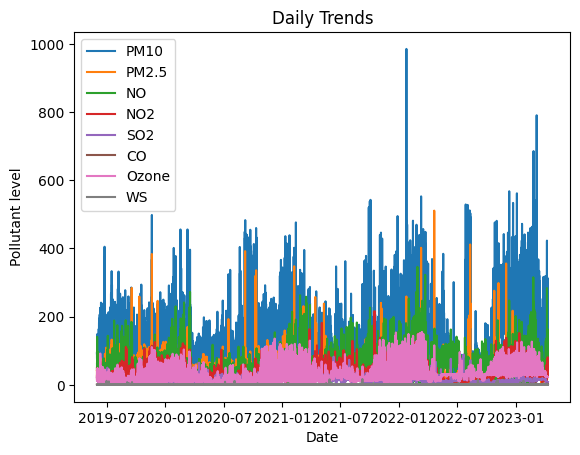

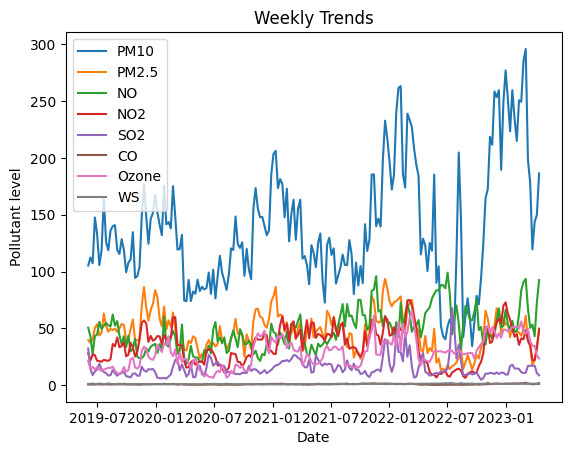

In [43]:
# Concatenate the data from all three sources
pollutant_data = pd.concat([kurla_data, airport_data, chakala_data])

# Convert the 'Date' column to a datetime object
pollutant_data['From Date'] = pd.to_datetime(pollutant_data['From Date'])

# Group the data by day and calculate the mean of each pollutant for each day
daily_pollutant_means = pollutant_data.groupby(['From Date']).mean()

# Group the data by week and calculate the mean of each pollutant for each week
weekly_pollutant_means = pollutant_data.groupby(pd.Grouper(key='From Date', freq='W')).mean()

# Plot daily trends for each pollutant
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'WS']
for pollutant in pollutants:
    plt.plot(daily_pollutant_means.index, daily_pollutant_means[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant level')
plt.title('Daily Trends')
plt.legend()
plt.show()

# Plot weekly trends for each pollutant
for pollutant in pollutants:
    plt.plot(weekly_pollutant_means.index, weekly_pollutant_means[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant level')
plt.title('Weekly Trends')
plt.legend()
plt.show()
